In [1]:
#Importing important liberies
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Loading datasets
(Xtrain,Ytrain),(Xtest,Ytest) = datasets.cifar10.load_data()
Xtrain.shape, Xtest.shape


((50000, 32, 32, 3), (10000, 32, 32, 3))

In [3]:
Ytrain.shape, Ytest.shape

((50000, 1), (10000, 1))

In [4]:
#Reshaping Ytest and Ytrain into vector (for convience)
Ytrain=Ytrain.reshape(-1,)
Ytest=Ytest.reshape(-1,)
Ytrain.shape, Ytest.shape

((50000,), (10000,))

In [5]:
#Creating labels
labels=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [6]:
def plotimg(X,y,idx):
  plt.figure(figsize=(2,2))
  plt.imshow(X[idx])
  plt.xlabel(labels[y[idx]])

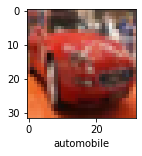

In [7]:
plotimg(Xtrain,Ytrain,5)

In [8]:
#Normalising the data
Xtrain=Xtrain/255
Xtest=Xtest/255

In [9]:
cnn=models.Sequential([
                       layers.Conv2D(filters=256,activation="relu",kernel_size=(3,3),input_shape=(32,32,3),padding='same'),
                       layers.Conv2D(filters=512,activation="relu",kernel_size=(3,3),padding='same'),
                       layers.MaxPooling2D((2,2)),
                       layers.Dropout(0.5),
                    
                       layers.Conv2D(filters=32,activation="relu",kernel_size=(3,3),padding='same'),
                       layers.Conv2D(filters=64,activation="relu",kernel_size=(3,3),padding='same'),
                       layers.MaxPooling2D((2,2)),

                       layers.Flatten(),

                       layers.Dense(128,activation='relu'),
                       layers.Dense(10,activation='softmax')

])

In [10]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
cnn.fit(Xtrain,Ytrain,shuffle='true',batch_size=256,epochs=50)

Epoch 1/50
196/196 [==============================] - 77s 395ms/step - loss: 0.4305 - accuracy: 0.8484
Epoch 2/50
196/196 [==============================] - 77s 393ms/step - loss: 0.3816 - accuracy: 0.8638
Epoch 3/50
196/196 [==============================] - 77s 392ms/step - loss: 0.3454 - accuracy: 0.8766
Epoch 4/50
196/196 [==============================] - 77s 393ms/step - loss: 0.3092 - accuracy: 0.8905
Epoch 5/50
196/196 [==============================] - 77s 391ms/step - loss: 0.2826 - accuracy: 0.8989
Epoch 6/50
196/196 [==============================] - 77s 391ms/step - loss: 0.2421 - accuracy: 0.9134
Epoch 7/50
196/196 [==============================] - 77s 393ms/step - loss: 0.2241 - accuracy: 0.9186
Epoch 8/50
196/196 [==============================] - 77s 394ms/step - loss: 0.2020 - accuracy: 0.9274
Epoch 9/50
196/196 [==============================] - 77s 394ms/step - loss: 0.1859 - accuracy: 0.9322
Epoch 10/50
196/196 [==============================] - 77s 395ms/step - l

In [14]:
cnn.evaluate(Xtest,Ytest)

313/313 [==============================] - 6s 18ms/step - loss: 2.4554 - accuracy: 0.7056


[2.455366373062134, 0.7056000232696533]